**PRACTICE EXERCISE 2**

**1. PROBLEM**

**Predict Hyundai Elantra car sales for 2013 and early 2014, based on previous data**

1.1. Data

The data is recorded in the elantra.csv file with the fields (Month, Year, ElantraSales, Unemployment, Queries, CPI_energy, CPI_all). The value to be predicted will be ElantraSales

1.2. Evaluation

Model evaluation based on RMSE and Business Requirement Measurement: Mean Relative Error

**2. SOLUTION**

**Using regression model**

2.1. Read data

Import libraries

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('elantra.csv')
print(df.tail(10))
print()
print("Data dimension:")
print(df.shape)
# rearrange the order of data rows by month/year
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

    Month  Year  ElantraSales  Unemployment  Queries  CPI_energy  CPI_all
40     10  2012         14512           7.8      257     256.389  231.652
41     10  2013         14876           7.2      223     243.374  233.782
42     11  2010          8631           9.8      161     219.303  219.544
43     11  2011         12414           8.6      255     247.092  227.136
44     11  2012         15923           7.8      246     248.136  231.190
45     11  2013         16751           7.0      231     242.301  234.033
46     12  2010         13096           9.4      170     227.190  220.437
47     12  2011         13025           8.5      253     243.015  227.093
48     12  2012         19024           7.9      275     244.698  231.099
49     12  2013         21692           6.7      279     246.189  234.594

Data dimension:
(50, 7)


Visualize the sales from time to time

Text(0, 0.5, 'Sales')

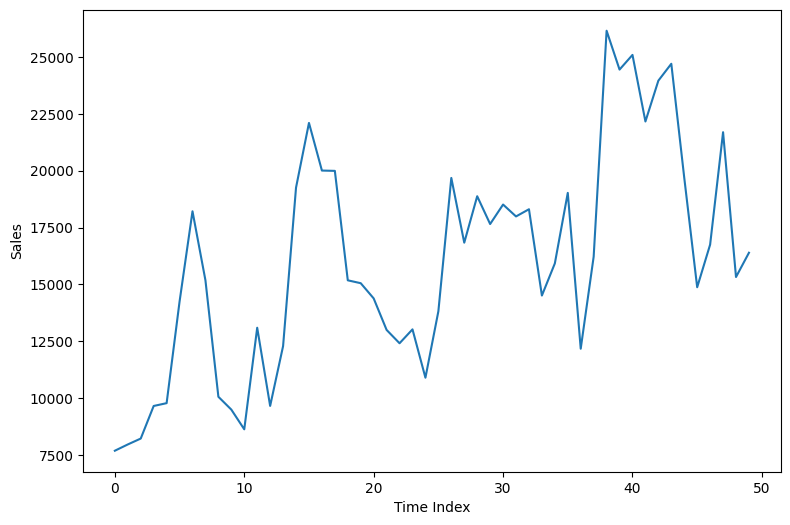

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 6))
plt.plot(df['ElantraSales'].values)
plt.xlabel('Time Index')
plt.ylabel('Sales')

Create input features for our model

In [5]:
print()
numeric_features = df.columns.drop(['Month', 'Year', 'ElantraSales'])
print("Numeric features:")
numeric_features


Numeric features:


Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all'], dtype='object')

Build data for training and testing

In [6]:
df_train = df[df['Year'] < 2013]
df_test = df[df['Year'] >= 2013]

y_train = df_train['ElantraSales'].values
y_test = df_test['ElantraSales'].values

2.2. Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train[numeric_features])

X_train = scaler.transform(df_train[numeric_features])
X_test = scaler.transform(df_test[numeric_features])

2.3. Build and evaluate regression model

In [8]:
# build model
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import mean_squared_error

# build relative error for business task evaluation
def relative_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred).astype(float) / y_true) * 100

y_pred = model.predict(X_test)
print()
print('RMSE loss: {:.2f}'.format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))))
print('Mean relative error: {:.2f}%'.format(relative_error(y_true=y_test, y_pred=y_pred)))


RMSE loss: 5017.35
Mean relative error: 18.96%


2.4. Compare model's prediction and real output

In [9]:
import matplotlib.pyplot as plt
print()
compare_data = pd.DataFrame({'Predicted': y_pred,
                             'True values': y_test,
                             'Difference': np.abs(y_test - y_pred)})
compare_data

,Predicted,True values,Difference
0,15129.324510,12174,2955.324510
1,15944.282804,16219,274.717196
2,17834.798498,26153,8318.201502
3,16486.455078,24445,7958.544922
4,16519.780333,25090,8570.219667
5,17765.698374,22163,4397.301626
6,17429.427906,23958,6528.572094
7,17597.602366,24700,7102.397634
8,18044.124071,19691,1646.875929
9,16520.884462,14876,1644.884462


Draw plot to compare y_pred and y_test

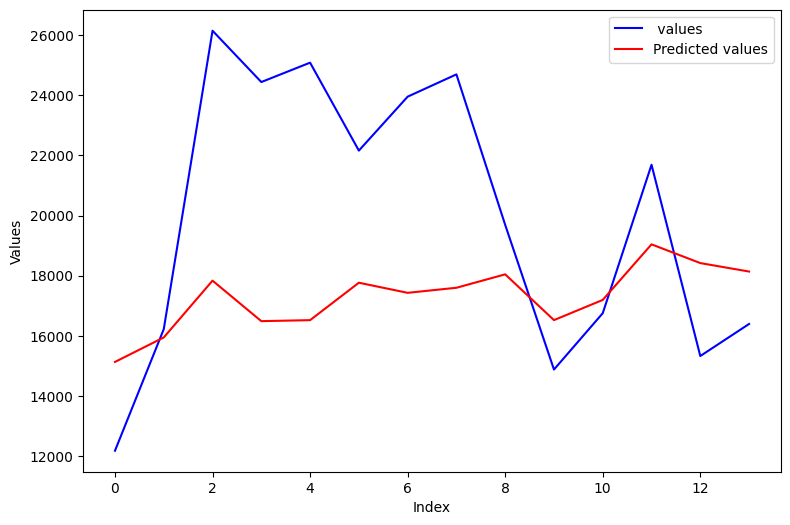

In [10]:
plt.figure(figsize=(9, 6))
plt.plot(y_test, label=' values', color='blue')
plt.plot(y_pred, label='Predicted values', color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.savefig('compare_before.png')

As we can see, the prediction results do not match the actual data at all

The reason may be that we have not fully utilized the information of the data

Observing that revenue tends to fluctuate from month to month in a year

=> Effectively utilize monthly information. It is possible to build a regression model with the Month feature in a categorical manner combined with other features.

2.5. Building better solution

In [11]:
# use non numeric feature for our model using one-hot encoding 
# (here we only use month feature)
month_feature_train = pd.get_dummies(df_train['Month'], prefix='Month')

month_feature_test = pd.get_dummies(df_test['Month'], prefix='Month')

Synchronize between training set and test set

In [12]:
month_feature_test = month_feature_test.reindex(columns=month_feature_train.columns, fill_value=0)

# convert to numpy array
month_feature_train = month_feature_train.values
month_feature_test = month_feature_test.values

X_train = np.concatenate((X_train, month_feature_train), axis=1)
X_test = np.concatenate((X_test, month_feature_test), axis=1)

2.6. Evaluate fixed model

In [13]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))))
print('Mean relative error: {:.2f}%'.format(relative_error(y_true=y_test, y_pred=y_pred)))

RMSE: 3590.37
Mean relative error: 12.78%


Plot difference between predicted and true sales with fixed model

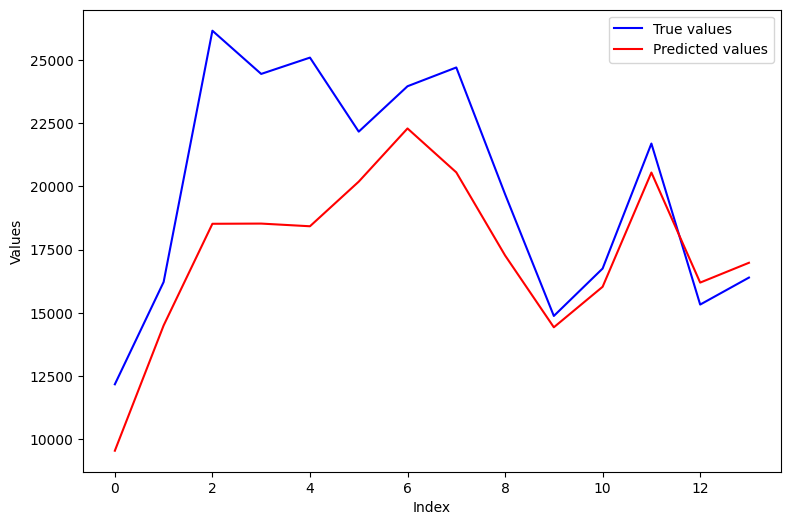

In [14]:
plt.figure(figsize=(9, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(y_pred, label='Predicted values', color='red')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.savefig('compare_after.png')